<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Cross-validation</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cross-validation es importante en el aprendizaje automático que ayuda a los científicos de datos a reducir el tamaño de los datos y garantiza que el modelos sean robusto.</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Los Datasets se divinden generalmente en 3:<BR>
Entrenamiento: se utiliza para entrenar el modelo y optimizar los hiperparámetros del modelo.<BR>
Prueba: se usa para verificar que el modelo optimizado funciona con datos desconocidos para probar que el modelo generaliza bien<BR>
Validación: durante la optimización, cierta información sobre el conjunto de prueba se filtra en el modelo por su elección de los parámetros para que pueda realizar una verificación final en datos completamente desconocidos<BR>     
</strong></p>    

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Ejemplo Simple</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<strong>Código adaptado y fuente de consulta:</strong></p> 
<p style="font-size:10px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://machinelearningmastery.com/k-fold-cross-validation/" target=\"_blank\">A Gentle Introduction to k-fold Cross-Validation</a>
</strong></p>
<p style="font-size:10px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/" target=\"_blank\">Repeated k-Fold Cross-Validation for Model Evaluation in Python</a>
</strong></p>
<p style="font-size:10px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python" target=\"_blank\">Nested Cross-Validation for Machine Learning with Python</a>
</strong></p>

In [25]:
from numpy import array
from sklearn.model_selection import KFold

data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

kfold = KFold(3, True, 1)

for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


C:\Users\Admin\.conda\envs\austral\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Modelo</strong></p> 

In [28]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Datos de Ejemplo</strong></p> 

In [32]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>KFold - Sin Repetición</strong></p> 

In [33]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>KFold - Con Repetición</strong></p> 

In [34]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>La expectativa de una validación cruzada repetida de k veces es que la media repetida sería una estimación más confiable del rendimiento del modelo que el resultado de un solo procedimiento de validación cruzada de k veces</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Nested Cross-Validation</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Nested cross-validation es un enfoque para modelar la optimización de hiperparámetros y la selección de modelos que intenta superar el problema de sobreajuste del conjunto de datos de entrenamiento.</strong></p> 

In [35]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

outer_results = list()

for train_ix, test_ix in cv_outer.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model = RandomForestClassifier(random_state=1)
    
    space = dict()
    space['n_estimators'] = [10, 100, 500]  #The number of trees in the forest.
    space['max_features'] = [2, 4, 6]       #The number of features to consider when looking for the best split
    
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    
    result = search.fit(X_train, y_train)
    
    best_model = result.best_estimator_
    
    yhat = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, yhat)
    
    outer_results.append(acc)
    
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

>acc=0.910, est=0.918, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.890, est=0.913, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.930, est=0.918, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.930, est=0.920, cfg={'max_features': 4, 'n_estimators': 100}
>acc=0.930, est=0.913, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.910, est=0.914, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.920, est=0.918, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.920, est=0.910, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.930, est=0.909, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.970, est=0.902, cfg={'max_features': 2, 'n_estimators': 500}


In [37]:
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

Accuracy: 0.924 (0.020)


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>K-Folds cross-validator</strong></p> 

<a id = "1.0"></a>
<p style="font-size:10px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html" target=\"_blank\">sklearn.model_selection.KFold</a>
</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Dividir el conjunto de datos en k pliegues (Folds) consecutivos</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>
n_splits: int default=5. Número de folds.<br>
shuffle: bool default=False. mezclar los datos antes de dividirlos en lotes. dentro de cada fold no se mezclarán.<BR>
random_state: int. random_state afecta el orden de los índices, que controla la aleatoriedad de cada fold.</strong></p>     

In [40]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [41]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [42]:
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:10px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<a href="https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12" target=\"_blank\">Complete guide to Python’s cross-validation with examples</a>
</strong></p> 

In [1]:
from sklearn.model_selection import KFold

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
kf3 = KFold(n_splits=3, shuffle=False)
kf3S = KFold(n_splits=3, shuffle=True, random_state=1)

In [51]:
kf5 = KFold(n_splits=5, shuffle=False)
kf5S = KFold(n_splits=5, shuffle=True, random_state=1)

In [53]:
rn = range(1,26)

In [54]:
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [55]:
def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

In [60]:
def  GrapKFold(train5, test5, train3, test3):
    fig,ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
    ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
    ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
    ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
    ax[0].set_ylabel("Kfold")
    ax[0].set_xlabel("Caracteristicas")
    ax[1].set_xlabel("Caracteristicas")
    ax[0].set_title("5 Folds")
    ax[1].set_title("3 Folds")
    plt.suptitle("Kfold dividido entre Entrenamiento y Test")
    plt.legend(bbox_to_anchor=(1.05, 1))
    return plt

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Sin Mezcla</strong></p> 

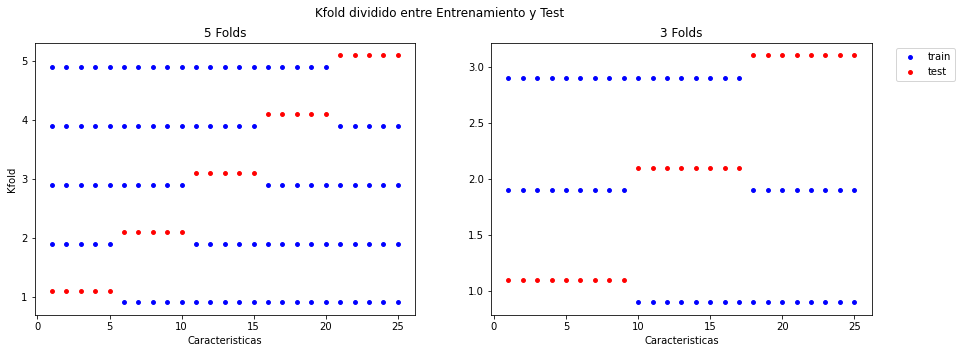

In [62]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

pltG = GrapKFold(train5, test5, train3, test3)
pltG.show()

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Con Mezcla</strong></p> 

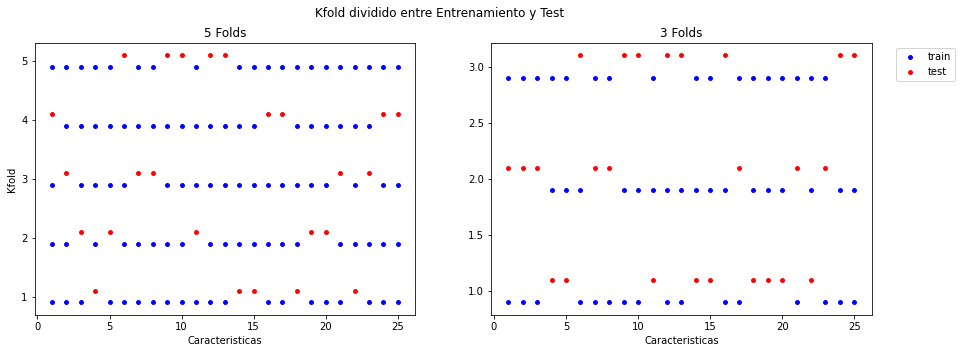

In [61]:
train5, test5 = kfoldize(kf5S,rn)
train3, test3 = kfoldize(kf3S,rn)

pltG = GrapKFold(train5, test5, train3, test3)
pltG.show()    

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Valor de K</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>El valor de k debe elegirse cuidadosamente para su muestra de datos.<BR>
Un valor mal elegido para k puede resultar en una idea mal representativa de la habilidad del modelo, como una puntuación con una alta varianza.<BR>
La elección de k suele ser 5 o 10, pero no existe una regla formal. A medida que k aumenta, la diferencia de tamaño entre el conjunto de entrenamiento y los subconjuntos de remuestreo se reduce.<BR></strong></p>     

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 